In [1]:
import pandas as pd

In [ ]:
import dataset_downloader as dd

dataset_downloader = dd.DatasetDownloader('https://www.kaggle.com/datasets/aksahaha/crop-recommendation')
dataset_downloader.download_dataset()


In [2]:
cls_dataset = pd.read_csv('E:/Datasets/Crop_Recommendation.csv')

In [3]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
cls_dataset['Crop'] = label_encoder.fit_transform(cls_dataset['Crop'])

X = cls_dataset.drop('Crop', axis=1)
y = cls_dataset['Crop']

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = True, random_state = 42)

Running GridSearchCV for DecisionTreeClassifier...
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best estimator: DecisionTreeClassifier()
Accuracy: 0.9848484848484849
Precision: 0.9853868158319482
Recall: 0.9848484848484849
F1_score: 0.9847473357071771


Running GridSearchCV for kNN...
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best estimator: KNeighborsClassifier(metric='euclidean', n_neighbors=3)
Accuracy: 0.9712121212121212
Precision: 0.9726629126286798
Recall: 0.9712121212121212
F1_score: 0.9711172439073181


Running GridSearchCV for RandomForest...
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best estimator: RandomForestClassifier()
Accuracy: 0.990909090909091
Precision: 0.9922727272727272
Recall: 0.990909090909091
F1_score: 0.9907321867321867


Running GridSearchCV for GradientBoostingClassifier...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best estimator: GradientBoostingClassifier(n_estimators=50)
Accuracy: 0.9833

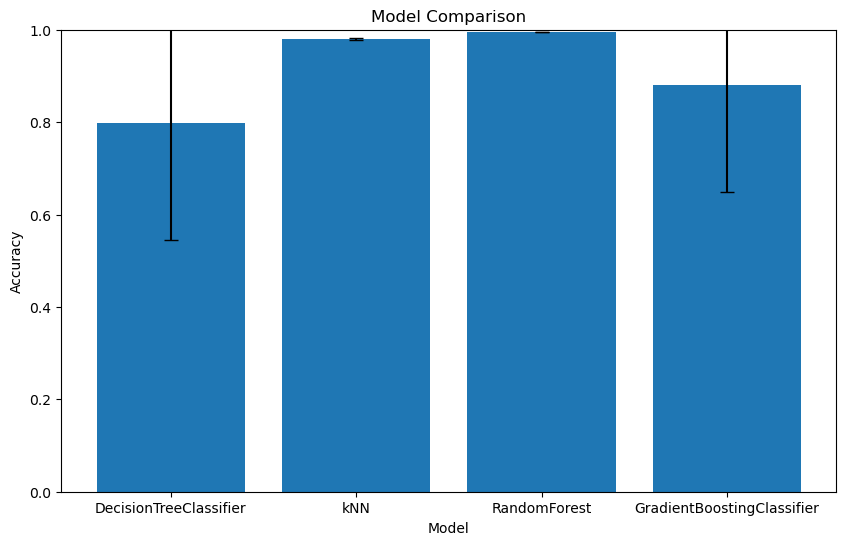

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
import training_pipeline as tp

# Define estimators
estimators = {
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'kNN': KNeighborsClassifier(),
    'RandomForest': RandomForestClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier()
}

# Define parameter grids
param_grids = {
    'DecisionTreeClassifier': {
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5, 10],
    },
    'kNN': {
        'n_neighbors': [3, 5, 7],
        'metric': ['euclidean', 'manhattan', 'minkowski'],
    },
    'RandomForest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
    },
    'GradientBoostingClassifier': {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 10],
        'learning_rate': [0.01, 0.1, 1]
    }
}

# Collect cross-validation scores
all_cv_scores = {}

for estimator_name in estimators:
    print(f"Running GridSearchCV for {estimator_name}...")
    pipeline = tp.TrainPipeline(estimators[estimator_name])
    best_estimator, cv_scores = pipeline.perform_gridsearch_and_crossval(param_grids[estimator_name], x_train, y_train)
    print(f"Best estimator: {best_estimator}")
    test_scores = pipeline.compute_scores(x_test, y_test)
    all_cv_scores[estimator_name] = cv_scores
    print("\n")

# Plot model comparison
pipeline.plot_model_comparison(all_cv_scores)
